# FLIP (00): Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2023 [TULIP Lab](http://www.tulip.org.au), Australia

---

# Session E - `Matplot` Interfaces

## Introduction

When I first started learning matplotlib, it seemed as if there was an infinite number of ways to do the same set of tasks. Searching for tutorials could present you with a collection of lessons, each achieving roughly the same goal, but doing so in a slightly different manner each time. I was being productive with matplotlib, but I didn't feel like I was getting any closer to really understanding how the library worked. The reason for my uneasiness was largely due to the fact that matplotlib has three different interfaces to choose from, each with its own set of pros and cons and special use cases.

In this lesson, we'll discuss the reason for the existence of each interface. We'll learn how to choose the right interface for the job. And, finally, we'll see an example of each interface in action.

Personally, I feel it's easiest to work from the top to the bottom, so we'll work our way inward from the interface that offers the highest-level of abstraction to the lowest. With that in mind, we'll begin by exploring the pylab interface.

## pylab

If you remember at the beginning of the course, I mentioned that matplotlib was originally created to make Python a viable alternative to Matlab. Given this goal, the author, John Hunter, set out to create an interface that would very closely match that of the Matlab language. The interface he created was called pylab and it provided a nearly one-to-one mapping of the procedurally-based, and stateful, Matlab interface. The major benefits to this interface is that it made it possible for Matlab devotees to make the switch to Python with relative ease. Though the interface has since been deprecated in favor of the pyplot interface, given that it puts everything you need right at your fingertips, and is less verbose than the other interfaces, I would argue that if you want to just pop into a python interpreter and do a quick "one off", interactive EDA session, it's still a good fit for the job.

The main problem, however, with the pylab interface is that it imports everything into the global namespace. This can cause issues with other user defined, or imported, functions eclipsing matplotlib functionality. It also obscures your code since it's not immediately obvious whether a function call comes from matplotlib or, for example, its dependent library, NumPy. For this reason, the pyplot module is now considered to be the canonical way to interactively explore data with matplotlib.

## pyplot

The idea behind the pyplot interface is that, even though the approach taken by pylab doesn’t follow good software engineering practices, users, nonetheless, still need a lightweight way to interact with matplotlib. The difference between pylab and pyplot is that pylab imports everything it uses into the global namespace making everything seem a bit “magical”, whereas pyplot makes it explicit where each function used in a script comes from. The pyplot approach leads to much easier to understand, and therefore, more maintainable code. As such, the pyplot interface is the preferred way to interactively explore a data set, and is now the interface used in the majority of tutorials that you'll find online. Also, just recently, the matplotlib documentation was overhauled and now, pretty consistently, uses pyplot everywhere.

Where the pyplot interface breaks down, however, is when you need more control over how your plots are created. pyplot provides a state machine like interface that purposefully obscures away the details of what classes are being instantiated and which instances are being modified with each function call. This is great when doing exploratory data analysis, but can be a bit limiting when writing scripts to process large amounts of data, or when embedding matplotlib into an application. In either of these cases, you'll need to drop down into matplotlib's object-oriented API.

## The Object-Oriented API

The pylab and pyplot interfaces are simply lightweight abstractions built atop matplotlib's set of classes for creating graphics. Calling a function like `plot` from either interface will first check for existing objects to modify, and then create them as needed. If you need more control over when classes are instantiated and how they're modified, however, then you're going to need to use the object-oriented API.

## Examples

Now that you understand the impetus behind each interface, its pros and cons, and when to use it, it's time to get a little taste of each one in action. We'll start with the Object-Oriented API and work our up to the highest level of abstraction so you can easily see what each layer adds to the previous one.

Now, one note before we continue, you can safely ignore the code in this first cell, it's here mainly just to make sure that our plots look consistent across each example.

In [1]:
%matplotlib inline

# Tweaking the 'inline' config a bit to make sure each bit of 
# code below displays the same plot.
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 4]
mpl.rcParams['figure.subplot.left'] = 0
mpl.rcParams['figure.subplot.bottom'] = 0
mpl.rcParams['figure.subplot.right'] = 1
mpl.rcParams['figure.subplot.top'] = 1

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# The current version of NumPy available from conda is issuing a warning 
# message that some behavior will change in the future when used with the 
# current version of matplotlib available from conda. This cell just keeps
# that warning from being displayed.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

/tmp/ipykernel_305693/2656575422.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Object-Oriented API

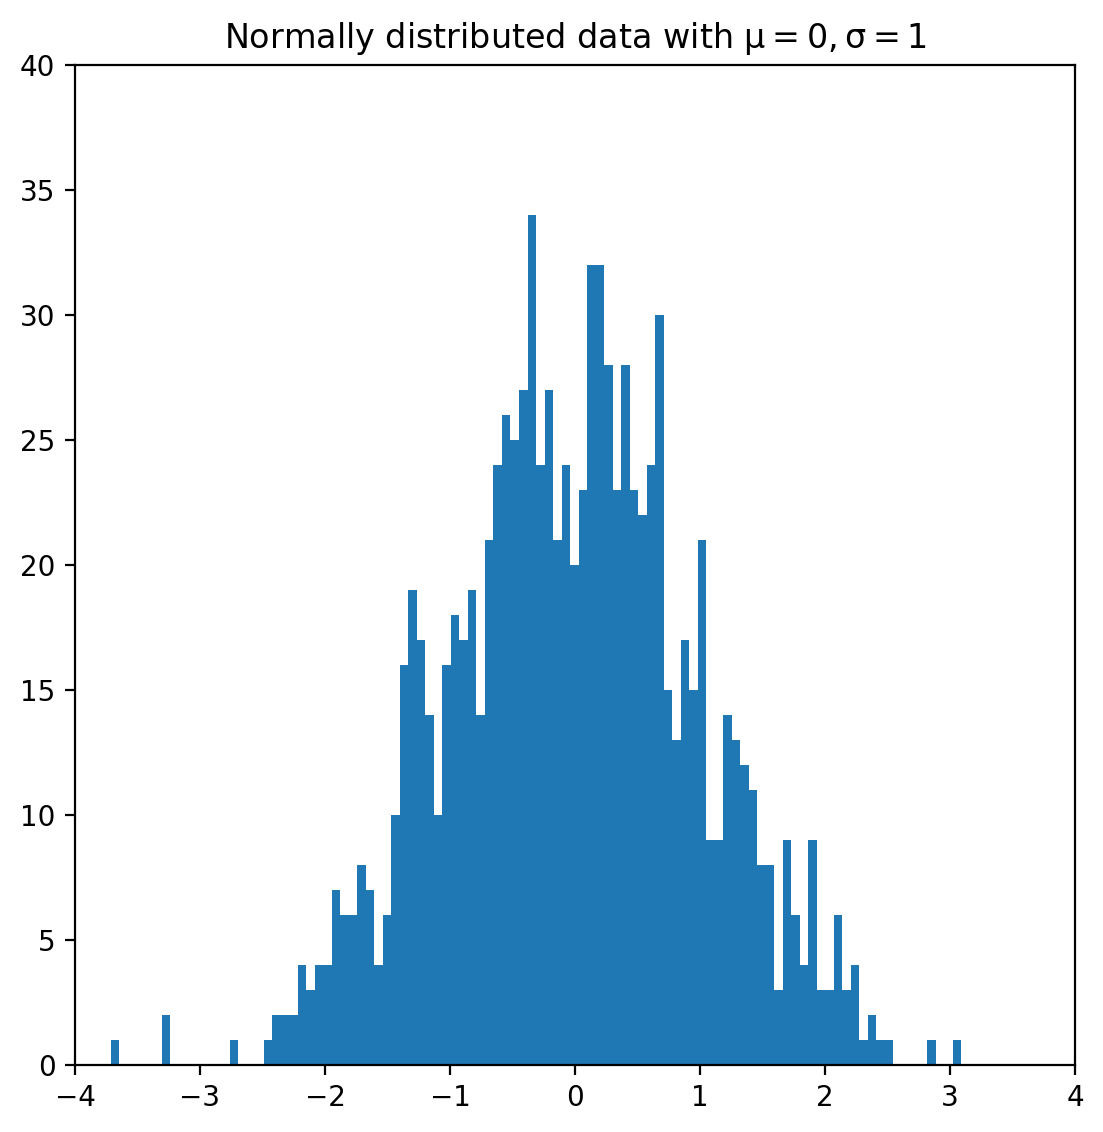

In [8]:
from IPython.display import display_png
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import numpy as np

# Define the size of the figure to prevent the spread 
# of the data from looking eliptical
fig = Figure(figsize=(5, 5))

# We've chosen the Agg canvas to render PNG output
canvas = FigureCanvasAgg(fig)

# Generate some radom (normally distributed) data using the NumPy library
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create a new Axes object using the subplot function from the Figure object
ax = fig.add_subplot(111)

# Set the x and y axis limits to 4 standard deviations from the mean
ax.set_xlim([-4, 4])
ax.set_ylim([0, 40])

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes container.  Here "100" means create 100 bins.
ax.hist(x, 100)
# ax.scatter(x, y)

# Decorate the figure with a title and save it.
ax.set_title('Normally distributed data with $\mu=0, \sigma=1$')

# Display the figure as PNG
display_png(fig);

## The Scripting Interface (pyplot)

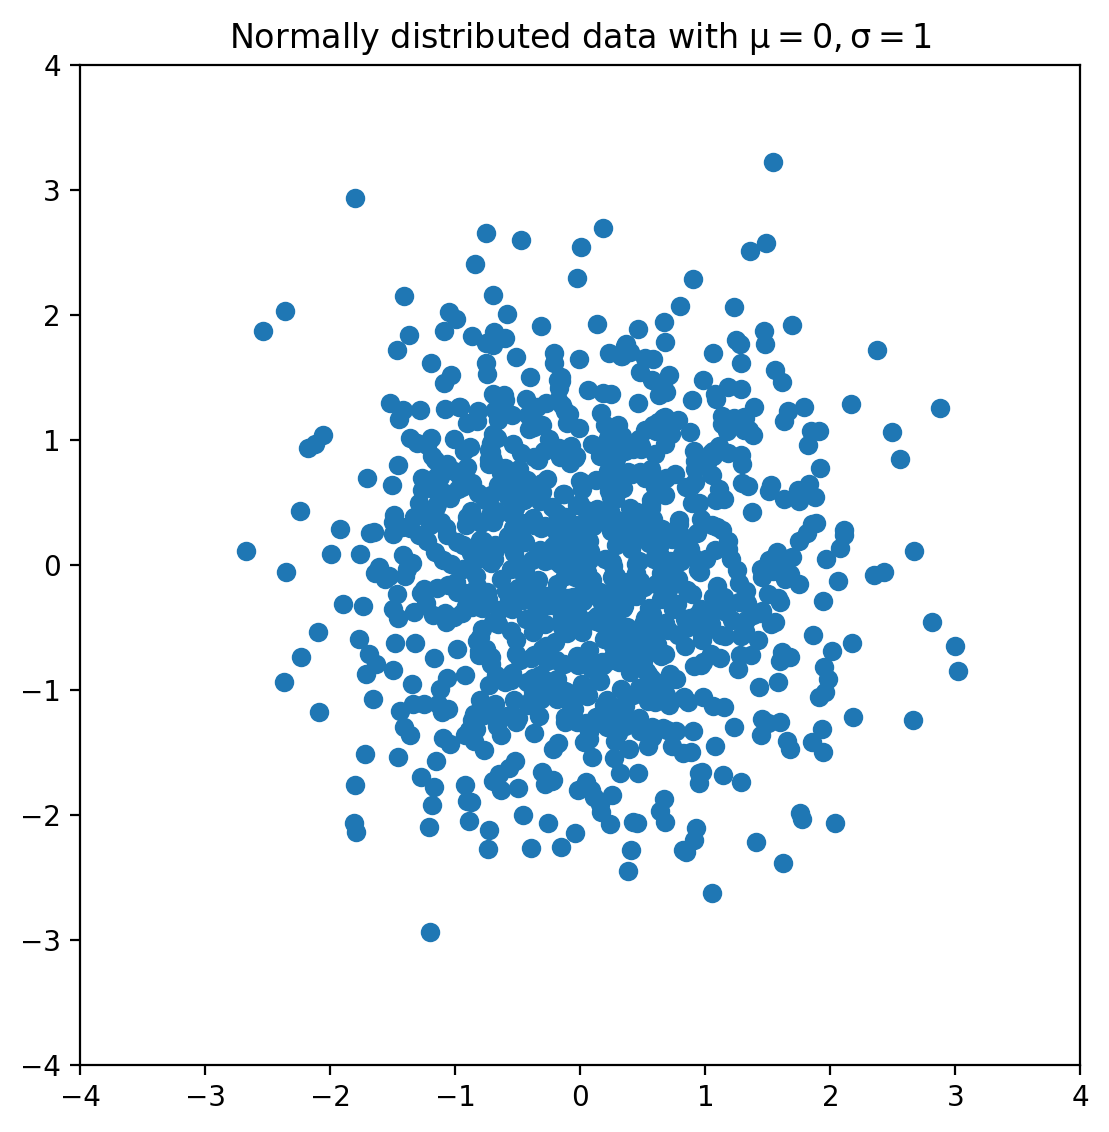

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(1000)
y = np.random.randn(1000)

# The creation of Figure and Axes objects is taken care of for us
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title('Normally distributed data with $\mu=0, \sigma=1$');

## The MATLAB Interface (pylab)

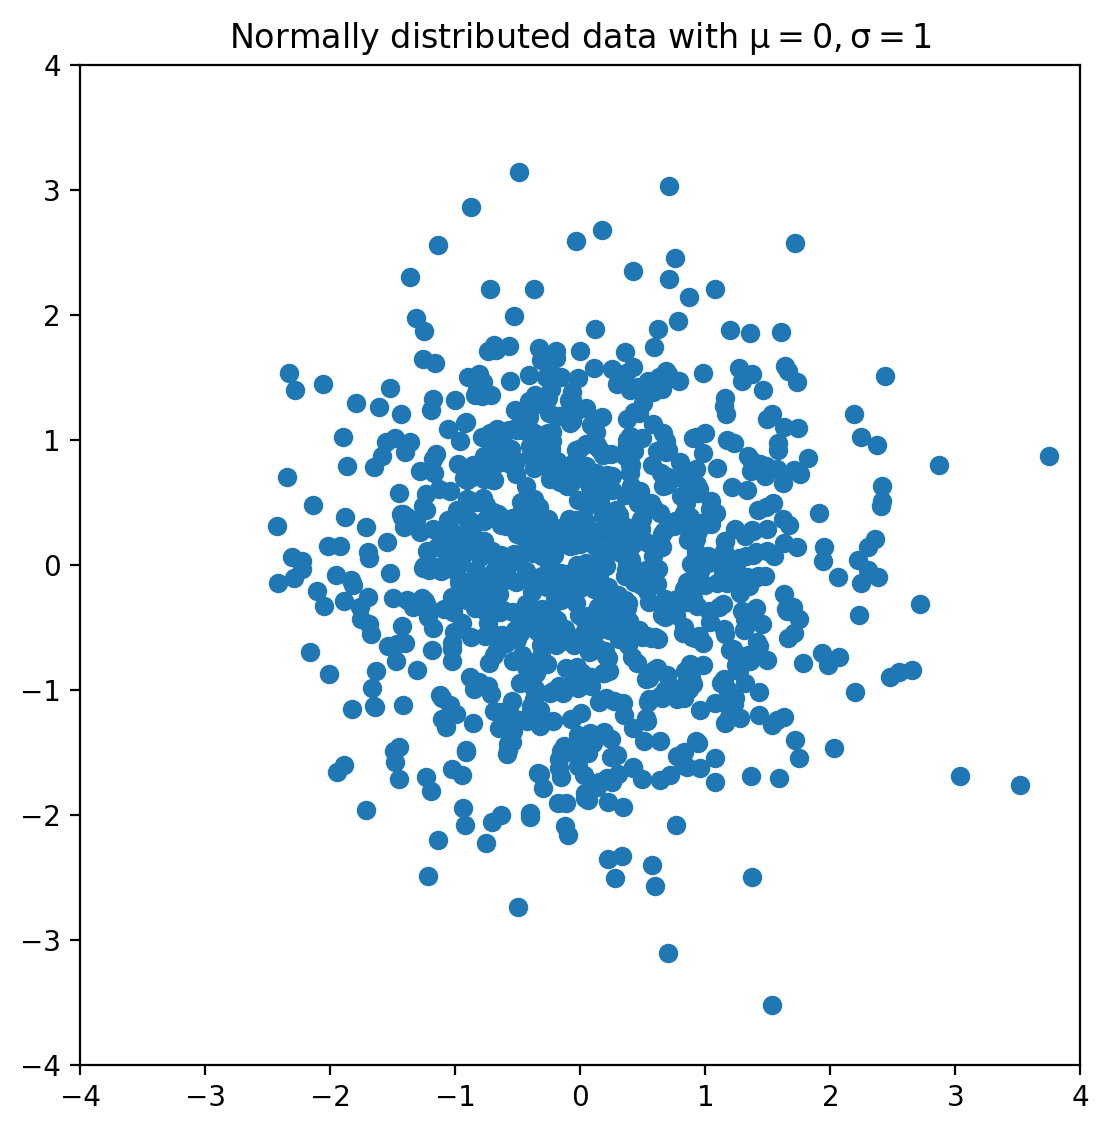

In [4]:
from pylab import *

# Even functions from the inner modules of NumPy are 
# made to be global
x = randn(1000)
y = randn(1000)

figure(figsize=(5, 5))
scatter(x, y)
xlim(-4, 4)
ylim(-4, 4)
title('Normally distributed data with $\mu=0, \sigma=1$');

## Conclusion

In this lesson, we learned about the different options you have for interacting with matplotlib. We discussed the pros and cons of each interface and when it's appropriate to use each one. And, finally, we got to compare each one through a simple example coded up in each interface. You should now be prepared to understand any of the tutorials or documentation that you run into when trying to further expand your knowledge of matplotlib.